# Problem Statement :
## Use Random Forest to prepare a model on fraud data. 
## Those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

## load the data

In [2]:
fraud = pd.read_csv('fraud.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
## EDA

In [4]:
fraud.shape

(600, 6)

<AxesSubplot: >

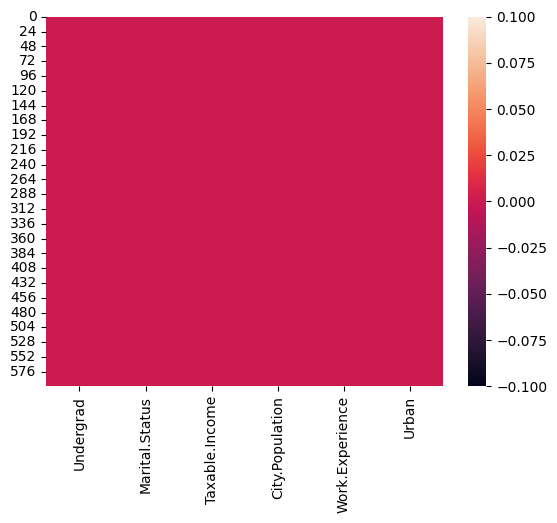

In [5]:
sns.heatmap(fraud.isnull())

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


## Feature Engineering and Visualization

In [8]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
# Taxable.Income < 30000 : risky  else Good

fraud['Taxable.Income'] = [0 if x <= 30000 else 1 for x in fraud['Taxable.Income']]
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


<AxesSubplot: xlabel='Taxable.Income', ylabel='count'>

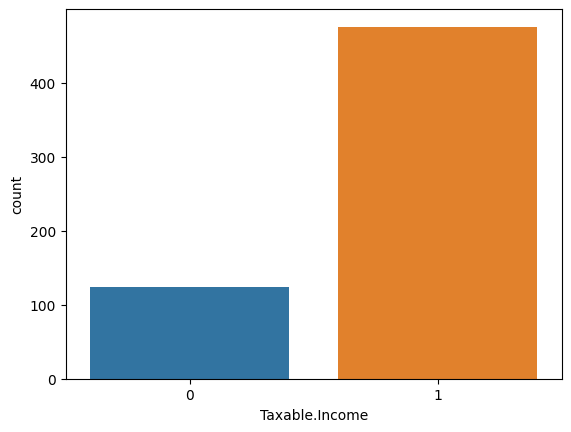

In [11]:
sns.countplot(data=fraud,x='Taxable.Income')

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
fraud[['Undergrad','Marital.Status','Urban']] = fraud[['Undergrad','Marital.Status','Urban']].apply(le.fit_transform)
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


<AxesSubplot: xlabel='Work.Experience'>

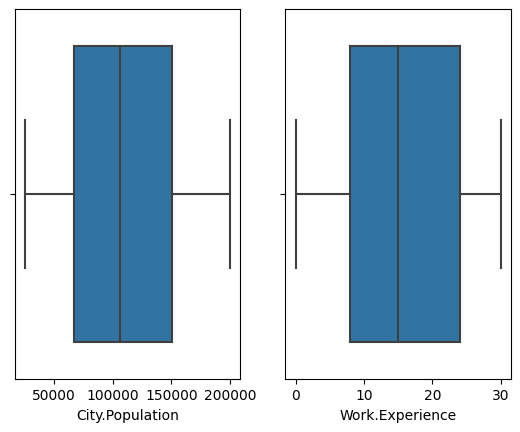

In [23]:
plt.subplot(1,2,1)
sns.boxplot(data=fraud,x='City.Population')
plt.subplot(1,2,2)
sns.boxplot(data=fraud,x='Work.Experience')


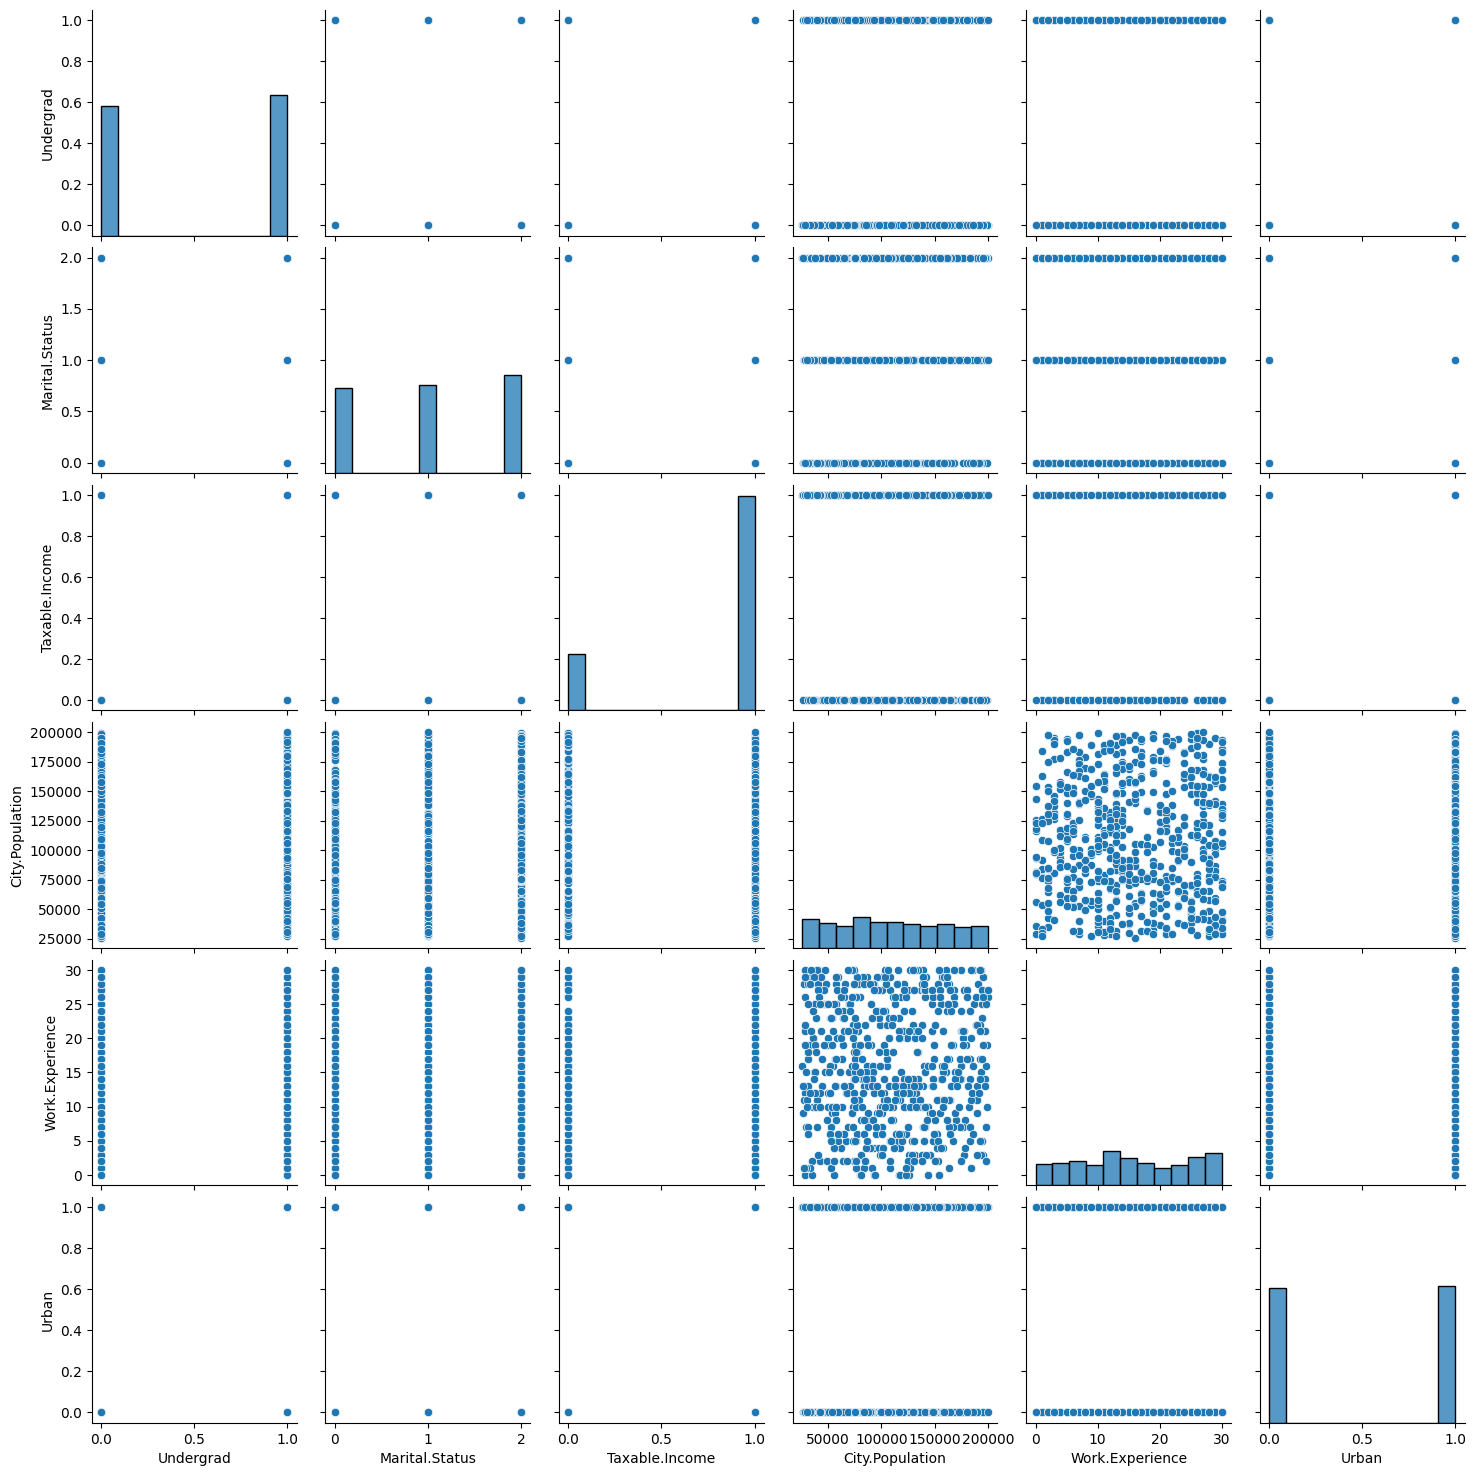

In [25]:
sns.pairplot(data=fraud)

## Data Preparation

In [26]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


In [27]:
x = fraud.iloc[:,[0,1,3,4,5]]
y = fraud.iloc[:,2]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
 random_state=42)

## Looking for best model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

num_trees = [50, 100,200]
tree_depth = [5, 10, 20]
criteria = ['gini','entropy']
max_features = ['sqrt','log2',None]
rfc = RandomForestClassifier(random_state=2)
param_grid = dict(n_estimators=num_trees, max_depth = tree_depth,max_features=max_features,criterion=criteria)
grid = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50
[CV 1/5; 1/54] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50;, score=0.800 total time=   0.1s
[CV 2/5; 1/54] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50
[CV 2/5; 1/54] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50;, score=0.792 total time=   0.2s
[CV 3/5; 1/54] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50
[CV 3/5; 1/54] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50;, score=0.792 total time=   0.2s
[CV 4/5; 1/54] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50
[CV 4/5; 1/54] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50;, score=0.792 total time=   0.1s
[CV 5/5; 1/54] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50
[CV 5/5; 1/54] END criterion=gini, max_depth=5, m

In [30]:
print(f'Best model : {grid_result.best_score_} using {grid_result.best_params_}')

Best model : 0.7933333333333332 using {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}


## Model Building

In [31]:
model = RandomForestClassifier(criterion='gini',max_depth=5,max_features='sqrt',n_estimators=50)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

## performance of model on training data

In [32]:
result = model.score(x_test,y_test)
result

0.7933333333333333

## Feature Importance

In [33]:
model.feature_importances_

array([0.04704956, 0.10090649, 0.51109831, 0.28617628, 0.05476936])

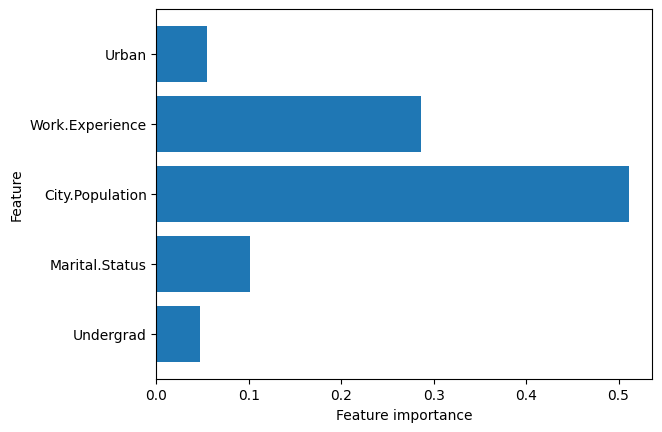

In [34]:
def plot_feature_importances(x_train,model):
	n_features = x_train.shape[1]
	plt.barh(range(n_features), model.feature_importances_, align='center')
	plt.yticks(np.arange(n_features),x_train.columns)
	plt.xlabel("Feature importance")
	plt.ylabel("Feature")

plot_feature_importances(x_test,model)

## Best feature : City.Population